In [1]:
import matplotlib.pyplot as plt
import numpy as np

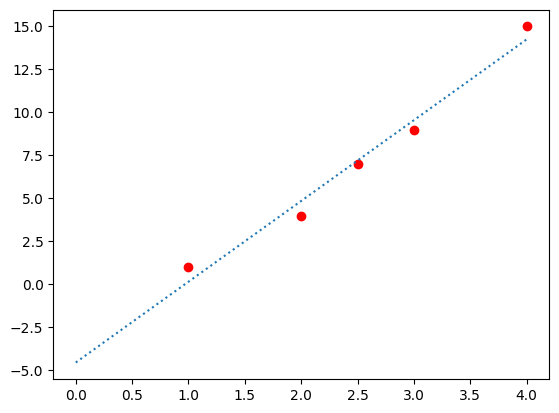

In [2]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
espX = sum(x)/len(x)
espY = sum(y)/len(y)
sumUp = 0
sumDown = 0
for i in range(len(x)):
    sumUp = sumUp + (x[i] - espX) * (y[i] - espY)
    sumDown += (x[i] - espX)**2
m = sumUp / sumDown
b = espY - (m * espX)
lastY = max(x) * m + b
x1 = np.array([0, max(x)])
y1 = np.array([b, lastY])
plt.plot(x, y, 'ro')
plt.plot(x1, y1, linestyle = 'dotted')
plt.show()


In [3]:
from mpl_toolkits import mplot3d

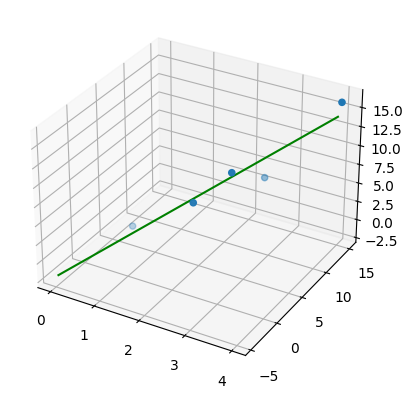

In [4]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
z = [3, 6, 9, 8, 16]
k = [1, 2, 3, 4, 5]
espX = sum(x)/len(x)
espY = sum(y)/len(y)
espZ = sum(z)/len(z)
espK = sum(k)/len(k)
sumX = 0
sumXY = 0
sumXZ = 0
sumXK = 0
for i in range(len(x)):
    sumXY = sumXY + (x[i] - espX) * (y[i] - espY)
    sumXZ = sumXZ + (x[i] - espX) * (z[i] - espZ)
    sumXK = sumXK + (x[i] - espX) * (k[i] - espK)
    sumX += (x[i] - espX)**2
mXY = sumXY / sumX
mXZ = sumXZ / sumX
mXK = sumXK / sumX
b = espY - (mXY * espX)
c = espZ - (mXZ * espX)
d = espK - (mXK * espX)
lastY = max(x) * mXY + b
lastZ = max(x) * mXZ + c
lastK = max(x) * mXK + d

xCoords = [0, max(x)]
yCoords = [b, lastY]
zCoords = [c, lastZ]
kCoords = [c, lastK]


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, 'gray')
ax.plot3D(xCoords, yCoords, zCoords, 'green')

In [5]:
def lobf(coords):
    params = []
    espX = sum(coords[0])/len(coords[0])
    sumX = 0
    for i in range(len(coords[0])):
        sumX += (coords[0][i] - espX)**2
    for dim in coords[1:]:
        espDim = sum(dim)/len(dim)
        sumDim = 0
        for i in range(len(dim)):
            sumDim = sumDim + (coords[0][i] - espX) * (dim[i] - espDim)
        mDim = sumDim / sumX
        ogn = espDim - (mDim * espX)
        params.append([mDim, ogn])
    return params

[[4.7, -4.55], [4.1, -1.8499999999999996], [1.4, -0.5]]



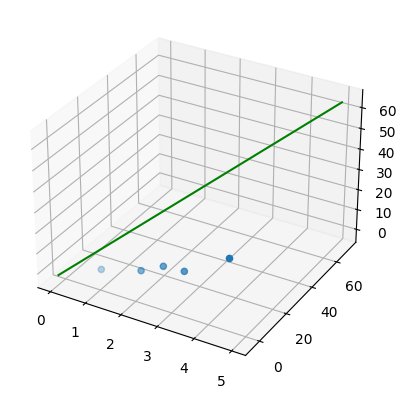

In [6]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
z = [3, 6, 9, 8, 16]
k = [1, 2, 3, 4, 5]
eq = lobf([x,y,z,k])

lastY = (max(y)+1) * eq[0][0] + eq[0][1]
lastZ = (max(y)+1) * eq[1][0] + eq[1][1]
lastK = (max(y)+1) * eq[2][0] + eq[2][1]

xCoords = [0, max(x) + 1]
yCoords = [b, lastY]
zCoords = [c, lastZ]
kCoords = [c, lastK]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, 'gray')
ax.plot3D(xCoords, yCoords, zCoords, 'green')
print(eq)
print()

In [7]:
def lobfComp(n, coords):
    comp = []
    espN = sum(coords[n])/len(coords[n])
    sumN = 0
    for i in range(len(coords[n])):
        sumN += (coords[0][i] - espN)**2
    if (n == len(coords) - 1):
        compCopie = coords[:n]
    else:
        compCopie = coords[:n] + coords[n+1:]
    for dim in compCopie:
        espDim = sum(dim)/len(dim)
        sumDim = 0
        for i in range(len(dim)):
            sumDim = sumDim + (coords[n][i] - espN) * (dim[i] - espDim)
        mDim = sumDim / sumN
        ogn = espDim - (mDim * espN)
        comp.append([mDim, ogn])
    return comp

In [8]:
def computeValues(v, equations):
    res = []
    for eq in equations:
        res.append(v * eq[0] + eq[1])
    return res

In [9]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
z = [3, 6, 9, 8, 16]

eq = lobfComp(0, [x,y,z])

print(eq)
computeValues(4, eq)

[[4.7, -4.55], [4.1, -1.8499999999999996]]


[14.25, 14.549999999999999]

In [10]:
def lobfComp(n, coords):
    comp = []
    espN = sum(coords[n])/len(coords[n])
    sumN = 0
    for i in range(len(coords[n])):
        sumN += (coords[0][i] - espN)**2
    if (n == len(coords) - 1):
        compCopie = coords[:n]
    else:
        compCopie = coords[:n] + coords[n+1:]
    for dim in compCopie:
        espDim = sum(dim)/len(dim)
        sumDim = 0
        for i in range(len(dim)):
            sumDim = sumDim + (coords[n][i] - espN) * (dim[i] - espDim)
        mDim = sumDim / sumN
        ogn = espDim - (mDim * espN)
        comp.append([mDim, ogn])
    return comp

In [11]:
def findValue(n, values, data):
    res = []
    espN = sum(data[n])/len(data[n])
    sumN = 0
    for i in range(len(data[n])):
        sumN += (data[0][i] - espN)**2
    for j in range (len(data)):
        if (j != n):
            espDim = sum(data[j])/len(data[j])
            sumDim = 0
            for i in range(len(data[j])):
                sumDim = sumDim + (data[j][i] - espDim) * (data[n][i] - espN)
            mDim = sumDim / sumN
            ogn = espN - (mDim * espDim)
            if (j == len(values)):
                index = j-1
            else:
                index = j
            res.append((values[index] * mDim + ogn))
    return res

In [12]:
import random

x = [k for k in range(1, 100)]
y = [k*1.1 for k in range(1, 100)]
z = [k*1.2 for k in range(1, 100)]

sumErreur = 0
for i in range(20):
    index = random.randrange(len(x))
    res = findValue(2, [x[index], y[index]], [x, y, z])
    erreur = abs(1-(((res[0] + res[1]) / 2) / z[index]))
    sumErreur += erreur
    print("Valeur trouvée : ", (res[0] + res[1]) / 2, "  Vraie valeur : ", z[index], "  Erreur : ", erreur)

print("\nErreur moyenne : ", sumErreur / 20)

Valeur trouvée :  31.647709090909107   Vraie valeur :  31.2   Erreur :  0.014349650349650966
Valeur trouvée :  19.834254545454563   Vraie valeur :  19.2   Erreur :  0.03303409090909182
Valeur trouvée :  65.90672727272728   Vraie valeur :  66.0   Erreur :  0.0014132231404957452
Valeur trouvée :  114.34189090909092   Vraie valeur :  115.19999999999999   Erreur :  0.007448863636363434
Valeur trouvée :  113.16054545454546   Vraie valeur :  114.0   Erreur :  0.00736363636363635
Valeur trouvée :  88.35229090909091   Vraie valeur :  88.8   Erreur :  0.005041769041769006
Valeur trouvée :  30.466363636363653   Vraie valeur :  30.0   Erreur :  0.015545454545455195
Valeur trouvée :  17.471563636363655   Vraie valeur :  16.8   Erreur :  0.039974025974027105
Valeur trouvée :  52.91192727272728   Vraie valeur :  52.8   Erreur :  0.002119834710744062
Valeur trouvée :  36.37309090909092   Vraie valeur :  36.0   Erreur :  0.010363636363636575
Valeur trouvée :  45.82385454545456   Vraie valeur :  45.6  

In [13]:
def minusSquare(coords):
    mX = sum(coords[0]) / len(coords[0])
    mY = sum(coords[1]) / len(coords[1])
    xS = 0
    for i in coords[0]:
        xS += i**2
    xS /= len(coords[0])
    xy = 0
    for i in range(len(coords[0])):
        xy += coords[0][i] * coords[1][i]
    xy /= len(coords[0])
    a = (xy - mX * mY) / ((xS) - mX**2)
    b = mY - a * mX
    return a, b

In [14]:
x = [k for k in range(1, 100)]
y = [k*4 for k in range(1, 100)]

eq = lobfComp(1, [x,y])

res = minusSquare([x, y])
print(res, eq)
" lobfComp plus d'erreur que moindresCarres "
valX = 12
print(res[0] * valX + res[1], eq[0][0] * valX + eq[0][1])

(4.0, 0.0) [[0.1401000714796283, 21.97998570407434]]
48.0 23.66118656182988


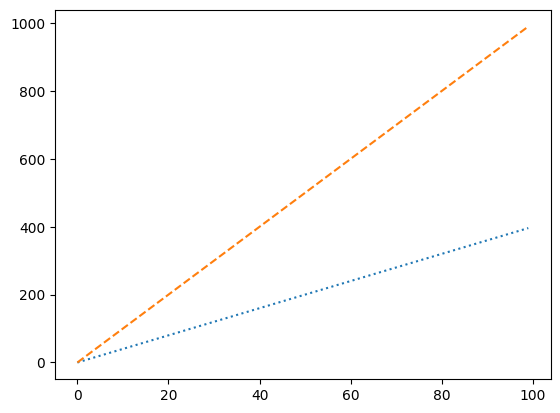

In [15]:
x = [k for k in range(1, 100)]
y = [k*4 for k in range(1, 100)]
z = [k*10 for k in range(1, 100)]
res = minusSquare([x, y])
res2 = minusSquare([x, z])

lastY = max(x) * res[0] + res[1]
lastZ = max(x) * res2[0] + res2[1]

x1 = np.array([0, max(x)])
y1 = np.array([res[1], lastY])
z1 = np.array([res2[1], lastZ])

#plt.plot(x, y, 'ro')
plt.plot(x1, y1, linestyle = 'dotted')
plt.plot(x1, z1, linestyle = 'dashed')
plt.show()

In [16]:
def findValuesMinusSquares(values, n, coords):
    res = []
    for i in range(len(coords)):
        if (i != n):
            eq = minusSquare([coords[i], coords[n]])
            res.append(eq[0] * values[i] + eq[1])
    return res

In [17]:
"""x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
z = [3, 6, 9, 8, 16]

i = 2

res = findValuesMinusSquares([x[i], y[i], z[i]], 2, [x, y, z])
"""

import random

x = [k for k in range(1, 100)]
y = [k*1.1 for k in range(1, 100)]
z = [k*1.2 for k in range(1, 100)]

sumErreur = 0
for i in range(20):
    index = random.randrange(len(x))
    res = findValuesMinusSquares([x[index], y[index], z[index]], 2, [x, y, z])
    erreur = abs(1-(((res[0] + res[1]) / 2) / z[index]))
    sumErreur += erreur
    print("Valeur trouvée : ", (res[0] + res[1]) / 2, "  Vraie valeur : ", z[index], "  Erreur : ", erreur)

print("\nErreur moyenne : ", sumErreur / 20)

Valeur trouvée :  38.400000000000034   Vraie valeur :  38.4   Erreur :  8.881784197001252e-16
Valeur trouvée :  10.800000000000065   Vraie valeur :  10.799999999999999   Erreur :  5.995204332975845e-15
Valeur trouvée :  15.60000000000006   Vraie valeur :  15.6   Erreur :  3.774758283725532e-15
Valeur trouvée :  82.79999999999998   Vraie valeur :  82.8   Erreur :  2.220446049250313e-16
Valeur trouvée :  43.20000000000003   Vraie valeur :  43.199999999999996   Erreur :  8.881784197001252e-16
Valeur trouvée :  52.800000000000026   Vraie valeur :  52.8   Erreur :  4.440892098500626e-16
Valeur trouvée :  75.6   Vraie valeur :  75.6   Erreur :  0.0
Valeur trouvée :  34.80000000000004   Vraie valeur :  34.8   Erreur :  1.3322676295501878e-15
Valeur trouvée :  51.60000000000002   Vraie valeur :  51.6   Erreur :  4.440892098500626e-16
Valeur trouvée :  110.39999999999995   Vraie valeur :  110.39999999999999   Erreur :  3.3306690738754696e-16
Valeur trouvée :  42.00000000000003   Vraie valeur : 

In [18]:
import pandas as pd
# reading csv files
def readFile(name):
    return pd.read_csv(name, sep=",")

In [19]:
file = readFile("file.csv")
print(file)

data = []
for attr in file:
    data.append(file[attr])

index = 4
res = findValuesMinusSquares([data[0][index], data[1][index], data[2][index]], 2, data)
print(res)

     x   y   z
0  1.0   1   3
1  2.0   4   6
2  2.5   7   9
3  3.0   9   8
4  4.0  15  16
5  5.0  20  22
6  6.0  25  28
[16.457198443579767, 16.703542573026724]


In [20]:
df = pd.DataFrame(
   {
      "x": [5, 2, 1, 9],
      "y": [4, 1, 5, 10],
      "z": [4, 1, 5, 0]
   }
)

df.to_csv("test.csv", sep=',')

In [21]:
file = pd.read_csv("cars.csv", sep=";")
print(file)

carNames = []
for line in file["Car"]:
    if not line in carNames:
        carNames.append(line)

carOrigins = []
for line in file["Origin"]:
    if not line in carOrigins:
        carOrigins.append(line)

collumns = []
for col in file:
    colValues = []
    for v in file[col]:
        colValues.append(v)
    collumns.append(colValues)

for i in range(len(collumns[0])): # car names replaced by numbers
    for j in range(len(carNames)):
        if collumns[0][i] == carNames[j]:
            collumns[0][i] = j

for i in range(len(collumns[-1])): # origins replaced by numbers
    for j in range(len(carOrigins)):
        if collumns[-1][i] == carOrigins[j]:
            collumns[-1][i] = j

print(collumns)

colNames = file.columns
dico = {}
for i in range(len(colNames)):
    dico[colNames[i]] = collumns[i]

df = pd.DataFrame(dico)
df.to_csv("myCars.csv", sep=',')



                           Car   MPG  Cylinders  Displacement  Horsepower   
0    Chevrolet Chevelle Malibu  18.0          8         307.0       130.0  \
1            Buick Skylark 320  15.0          8         350.0       165.0   
2           Plymouth Satellite  18.0          8         318.0       150.0   
3                AMC Rebel SST  16.0          8         304.0       150.0   
4                  Ford Torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
401            Ford Mustang GL  27.0          4         140.0        86.0   
402          Volkswagen Pickup  44.0          4          97.0        52.0   
403              Dodge Rampage  32.0          4         135.0        84.0   
404                Ford Ranger  28.0          4         120.0        79.0   
405                 Chevy S-10  31.0          4         119.0        82.0   

     Weight  Acceleration  Model  Origin  
0    3504.0          12.0     70

In [51]:
import math

file = readFile("myCars.csv")

data = []
for attr in file:
    data.append(file[attr])

start = 2
data = data[start:]
vIndex = 26
values = []
for i in range(0, len(data)):
    values.append(data[i][vIndex])
res = findValuesMinusSquares(values, 4, data)

for i in res:
    print(i)
result = sum(res) / len(res)
print("Result =", result)

2824.6993884200674
2326.0242601524815
2341.2306226277715
2688.898817131318
2722.0828184930274
3401.358331962906
2712.007028582904
Result = 2716.61446676721


In [52]:
def drawCurve(cx, cy):
    eq = minusSquare([cx, cy])
    print(eq)
    x = np.array([min(cx), max(cx)])
    y = np.array([min(cx) * eq[0] + eq[1], max(cx) * eq[0] + eq[1]])
    plt.plot(cx, cy, 'ro')
    plt.plot(x, y, linestyle = 'dotted')
    plt.show()

Weight
MPG
(-79.39085983500114, 4809.470884295096)


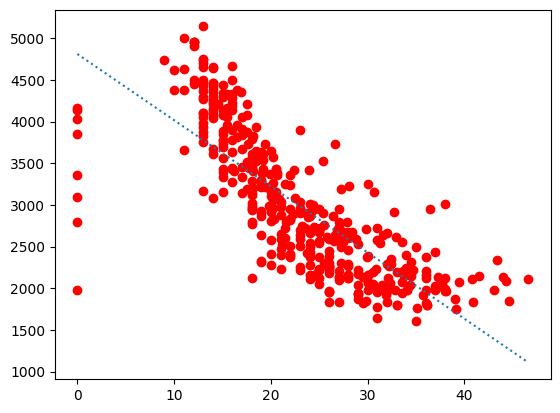

Cylinders
(442.8650256729425, 554.5641574607112)


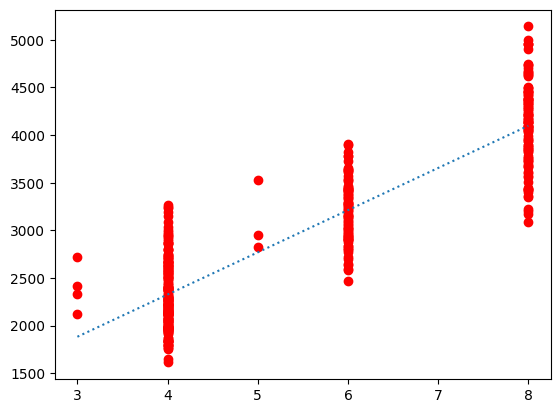

Displacement
(7.527559658143401, 1513.1990602319972)


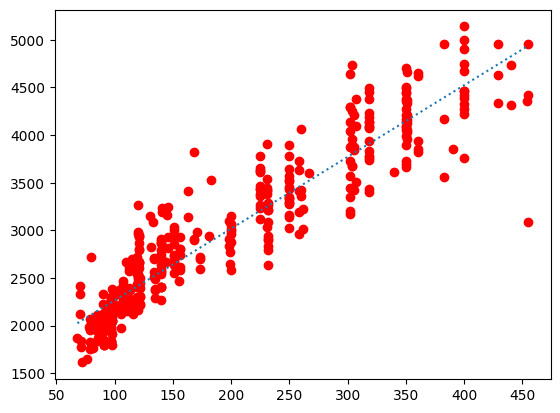

Horsepower
(17.57548506104677, 1159.831616820249)


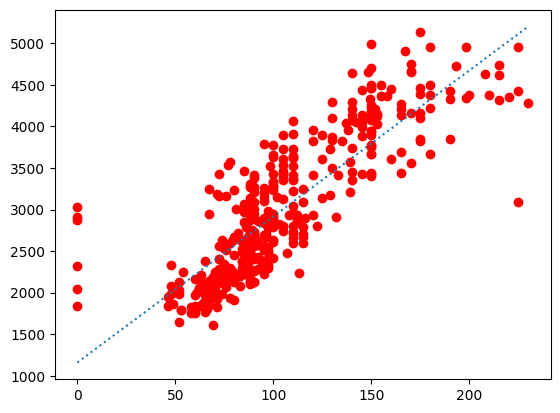

Acceleration
(-129.9457409102364, 4996.133284422164)


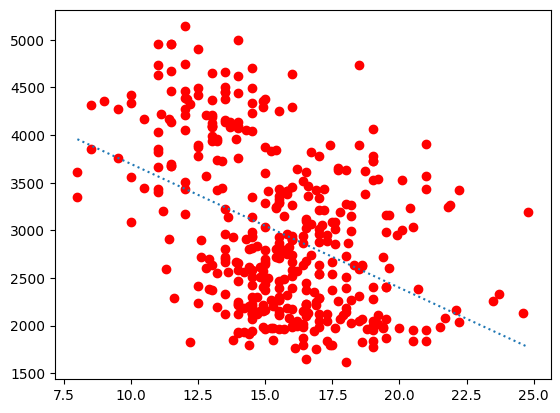

Model
(-71.26018418341936, 8389.571224802261)


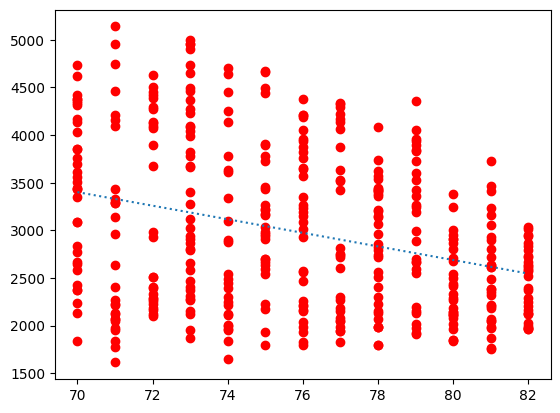

Origin
(-620.3836936876636, 3332.3907222705675)


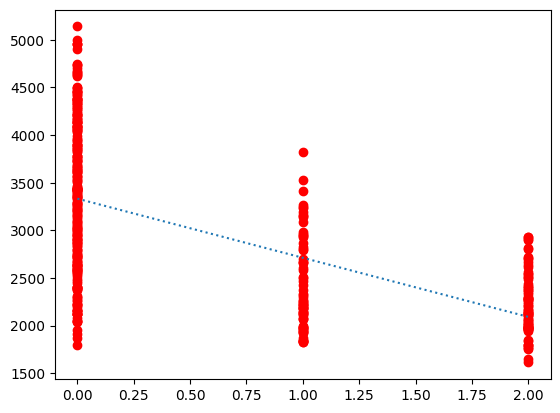

In [70]:
n = 4
print(colNames[n + 1])

for i in range(len(data)):
        if (i != n):
            print(colNames[i + 1])
            eq = drawCurve(data[i], data[n])
            